In [ ]:
#Importing the useful libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# Exploratory Data Analysis

In [ ]:
#Loading the data
df = pd.read_csv("dataset.csv")

In [ ]:
# Printing the first five rows
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [ ]:
#Renaming our main variable
df.rename(columns={'DEATH_EVENT':'heart_failure'}, inplace=True)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'heart_failure'],
      dtype='object')

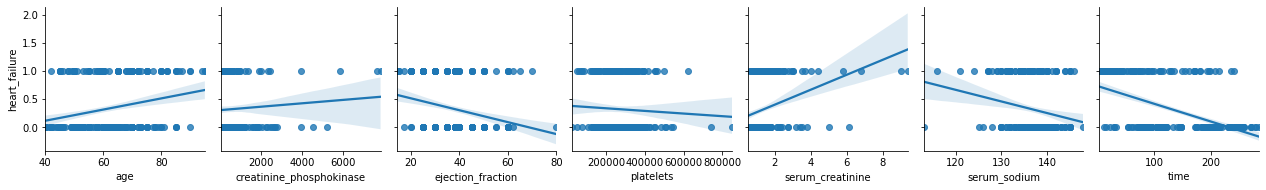

In [ ]:
#I use "diag_kind = None" for appear the first graph.
sns.pairplot(df, x_vars = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'], y_vars= ['heart_failure'],kind='reg', diag_kind = None)

In [ ]:
#Verifying if there are nulls.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
heart_failure               0
dtype: int64

In [ ]:
# Importando o Pandas Profiling
from pandas_profiling import ProfileReport

In [ ]:
#Loading the Pandas Profiling Report 

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
#Loading the correlation table

df_corr = df.corr()
df_corr

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
heart_failure             0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
heart_failure            -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
heart_failure             -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  heart_failure  
age                       0.018668 -0.224068       0.253729  
anaemia                  -0.107290 -0.141414       0.066270  
creatinine_phosphokinase  0.002421 -0.009346       0.062728  
diabetes                 -0.147173  0.033726      -0.001943  
ejection_fraction        -0.067315  0.041729      -0.268603  
high_blood_pressure      -0.055711 -0.196439       0.079351  
platelets                 0.028234  0.010514      -0.049139  
serum_creatinine         -0.027414 -0.149315       0.294278  
serum_sodium              0.004813  0.087640      -0.195204  
sex                       0.445892 -0.015608      -0.004316  
smoking                   1.000000 -0.022839      -0.012623  
time                  

In [ ]:
# Loading the correlation table to level higher than 0.3

df_corr[df_corr > 0.3]

age  anaemia  creatinine_phosphokinase  diabetes  \
age                       1.0      NaN                       NaN       NaN   
anaemia                   NaN      1.0                       NaN       NaN   
creatinine_phosphokinase  NaN      NaN                       1.0       NaN   
diabetes                  NaN      NaN                       NaN       1.0   
ejection_fraction         NaN      NaN                       NaN       NaN   
high_blood_pressure       NaN      NaN                       NaN       NaN   
platelets                 NaN      NaN                       NaN       NaN   
serum_creatinine          NaN      NaN                       NaN       NaN   
serum_sodium              NaN      NaN                       NaN       NaN   
sex                       NaN      NaN                       NaN       NaN   
smoking                   NaN      NaN                       NaN       NaN   
time                      NaN      NaN                       NaN       NaN   
heart_failure             NaN      NaN                       NaN       NaN   

                          ejection_fraction  high_blood_pressure  platelets  \
age                                     NaN                  NaN        NaN   
anaemia                                 NaN                  NaN        NaN   
creatinine_phosphokinase                NaN                  NaN        NaN   
diabetes                                NaN                  NaN        NaN   
ejection_fraction                       1.0                  NaN        NaN   
high_blood_pressure                     NaN                  1.0        NaN   
platelets                               NaN                  NaN        1.0   
serum_creatinine                        NaN                  NaN        NaN   
serum_sodium                            NaN                  NaN        NaN   
sex                                     NaN                  NaN        NaN   
smoking                                 NaN                  NaN        NaN   
time                                    NaN                  NaN        NaN   
heart_failure                           NaN                  NaN        NaN   

                          serum_creatinine  serum_sodium       sex   smoking  \
age                                    NaN           NaN       NaN       NaN   
anaemia                                NaN           NaN       NaN       NaN   
creatinine_phosphokinase               NaN           NaN       NaN       NaN   
diabetes                               NaN           NaN       NaN       NaN   
ejection_fraction                      NaN           NaN       NaN       NaN   
high_blood_pressure                    NaN           NaN       NaN       NaN   
platelets                              NaN           NaN       NaN       NaN   
serum_creatinine                       1.0           NaN       NaN       NaN   
serum_sodium                           NaN           1.0       NaN       NaN   
sex                                    NaN           NaN  1.000000  0.445892   
smoking                                NaN           NaN  0.445892  1.000000   
time                                   NaN           NaN       NaN       NaN   
heart_failure                          NaN           NaN       NaN       NaN   

                          time  heart_failure  
age                        NaN            NaN  
anaemia                    NaN            NaN  
creatinine_phosphokinase   NaN            NaN  
diabetes                   NaN            NaN  
ejection_fraction          NaN            NaN  
high_blood_pressure        NaN            NaN  
platelets                  NaN            NaN  
serum_creatinine           NaN            NaN  
serum_sodium               NaN            NaN  
sex                        NaN            NaN  
smoking                    NaN            NaN  
time                       1.0            NaN  
heart_failure              NaN            1.0

## Distribution
### The variable distribution is important for us because it represents the randomness of our data. We need of data distributed to have goods independents variables to predict our dependent variable.

### There are two reason to remove variables with low distribution:
1. Variable is random, but it won't help us to determinate our dependent variable because the values of this variable are not so distributed as it is necessary to generate an intelligence from them.
2. Variable is not random, so it's not significant to determinate our dependent variable

### We have saw too that the variables have a good distribution at the *pandas profile report*. I put a limit of 70-30 for a good distribution, because a concentration more than 70% can give us some problem.

## Let's look specially to our target.

In [ ]:
df['heart_failure'].mean()

0.3210702341137124

### We can have a problem with the distribution of the target "heart_failure". In our dataset almost 70% have a value 0, that is, haven't had heart failure. 

### How we want to classificate between two class ("have had heart failure" and "haven't had heart failure"), maybe our model gives 70% of accuracy, but it gives us only value 0. It's not a good model, it always will return only one class. 

### We call it of *false alarm*. We can fix it when run our model. In advance, I'll use the method *under_sampling*. But, I want to show the results with unbalanced and balanced data for comparison!

In [ ]:
# Spliting the data 

X = df.drop(["heart_failure"], axis=1)
y = df["heart_failure"]

x_train, x_test, y_train, y_test =  train_test_split(X, y, random_state=1)

# Fitting the data with Logistic Regression

## Unbalanced Data

In [ ]:
lreg = LogisticRegression(random_state=1)

lreg.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8814    0.9455    0.9123        55
           1     0.8125    0.6500    0.7222        20

    accuracy                         0.8667        75
   macro avg     0.8469    0.7977    0.8173        75
weighted avg     0.8630    0.8667    0.8616        75



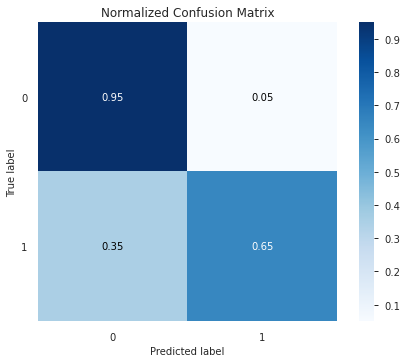

In [ ]:
y_pred =  lreg.predict(x_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

#plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
lreg.coef_

array([[ 3.94838591e-02,  1.97457573e-04,  1.75594494e-04,
         4.06834546e-04, -5.61116568e-02, -1.81566433e-04,
        -3.38441051e-06,  6.17319992e-03,  1.36539477e-02,
         1.51966314e-04, -1.81554381e-04, -1.90188416e-02]])

1    76
0    76
Name: heart_failure, dtype: int64


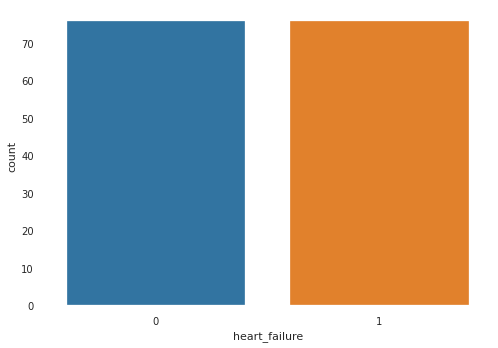

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(x_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

In [ ]:
lreg_us = LogisticRegression(random_state=1)
lreg_us.fit(X_res, y_res)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8837    0.6909    0.7755        55
           1     0.4688    0.7500    0.5769        20

    accuracy                         0.7067        75
   macro avg     0.6762    0.7205    0.6762        75
weighted avg     0.7731    0.7067    0.7226        75



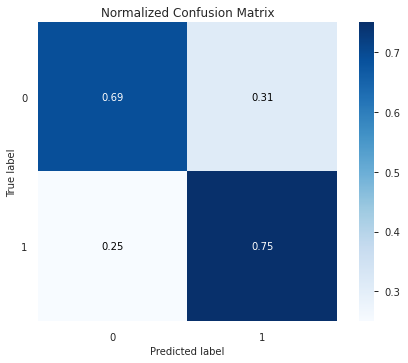

In [ ]:
y_pred = lreg_us.predict(x_test)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8421    0.8727    0.8571        55
           1     0.6111    0.5500    0.5789        20

    accuracy                         0.7867        75
   macro avg     0.7266    0.7114    0.7180        75
weighted avg     0.7805    0.7867    0.7830        75



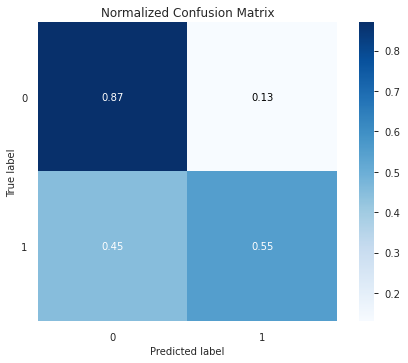

In [ ]:
y_pred = dtree.predict(x_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## Balanced Data

In [ ]:
dtree_us = DecisionTreeClassifier(random_state=1)
dtree_us.fit(X_res, y_res)

DecisionTreeClassifier(random_state=1)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9556    0.7818    0.8600        55
           1     0.6000    0.9000    0.7200        20

    accuracy                         0.8133        75
   macro avg     0.7778    0.8409    0.7900        75
weighted avg     0.8607    0.8133    0.8227        75



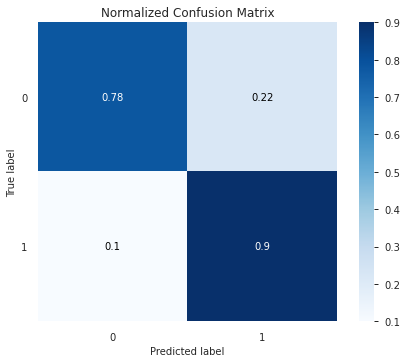

In [ ]:
y_pred = dtree_us.predict(x_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)